# Week 3: DSGE
## Problem set 2: Linearization

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

## Exercise 1


$\overline{K} = \alpha \beta^{\frac{1}{1-\alpha}}$  
$F=\frac{\alpha \overline{K}^{\alpha-1}}{\overline{K}^{\alpha}-\overline{K}}$  
$G=-\frac{\alpha \overline{K}^{\alpha-1}\left(\alpha+\overline{K}^{\alpha-1}\right)}{\overline{K}^{\alpha}-\overline{K}}$  
$H=\frac{\alpha^{2} \overline{K}^{2(\alpha-1)}}{\overline{K}^{\alpha}-\overline{K}}$  
$L=-\frac{\alpha \overline{K}^{2 \alpha-1}}{\overline{K}^{\alpha}-\overline{K}}$  
$M=\frac{\alpha^{2} \overline{K}^{2(\alpha-1)}}{\overline{K}^{\alpha}-\overline{K}}$  
$N=I_{n_z}$, exogenous, determines the law of motion.

In [2]:
def policy(α, β, ρ, K0, z0):
    Kbar = (α * β)**(1/(1-α))
    F = α*Kbar**(α-1)/(Kbar**α - Kbar)
    G = -α*Kbar**(α-1)*(α+Kbar**(α-1))/(Kbar**α - Kbar)
    H = α**2*Kbar**(2*(α-1))/(Kbar**α - Kbar)
    L = -α*Kbar**(2*α-1)/(Kbar**α - Kbar)
    M = α**2*Kbar**(2*(α-1))/(Kbar**α - Kbar)
    N = ρ
    
    P1 = (-G + np.sqrt(G**2 - 4*F*H))/(2*F)
    P2 = (-G - np.sqrt(G**2 - 4*F*H))/(2*F)
    Q1 = -(L*N + M)/(F*N+F*P1+G)
    Q2 = -(L*N + M)/(F*N+F*P2+G)
    
    K1 = Kbar + P1*(K0 - Kbar) + Q1*z0
    K2 = Kbar + P2*(K0 - Kbar) + Q2*z0
    
    return K1, K2

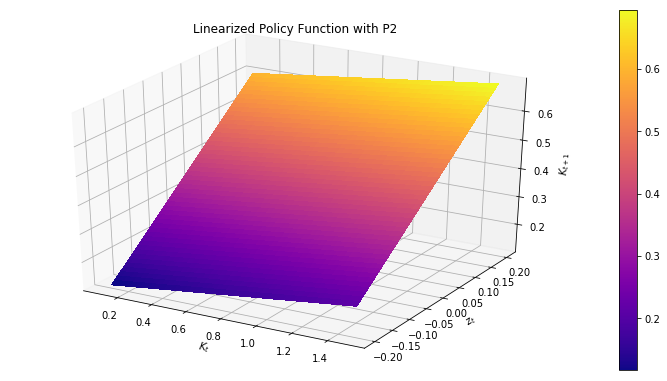

In [3]:
α = 0.35
β = 0.98
ρ = 0.95
σ = 0.02

numpoints = 50
Kmax = 1.5
Kmin = 0.1
zmax = 10 * σ
zmin = -10 * σ
K_grid = np.linspace(Kmin, Kmax, 50)
z_grid = np.linspace(zmin, zmax, 50)

KK, ZZ = np.meshgrid(K_grid, z_grid)

policy_value1 = np.zeros((numpoints, numpoints))
policy_value2 = np.zeros((numpoints, numpoints))
for i in range(numpoints):
    policy_value1[i,:] = policy(α, β, ρ, K_grid[i], z_grid)[0]
    policy_value2[i,:] = policy(α, β, ρ, K_grid[i], z_grid)[1]

# we should pick the one with P<1, which is P2
# fig = plt.figure(figsize = (10,5))
# ax = Axes3D(fig)
# surf = ax.plot_surface(KK, ZZ, policy_value1, cmap='plasma', linewidth=0, antialiased=False)
# ax.set_title('Linearized Policy Function with P1')
# ax.set_xlabel(r'$K_t$')
# ax.set_ylabel(r'$z_t$')
# ax.set_zlabel(r'$K_{t+1}$')
# fig.colorbar(surf)
# plt.show()

fig = plt.figure(figsize = (10,5))
ax = Axes3D(fig)
surf = ax.plot_surface(KK, ZZ, policy_value2, cmap='plasma', linewidth=0, antialiased=False)
ax.set_title('Linearized Policy Function with P2')
ax.set_xlabel(r'$K_t$')
ax.set_ylabel(r'$z_t$')
ax.set_zlabel(r'$K_{t+1}$')
fig.colorbar(surf)
plt.show()

## Exerise 2

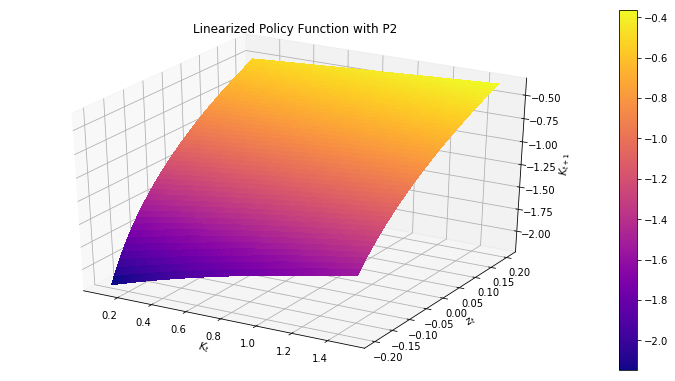

In [4]:
α = 0.35
β = 0.98
ρ = 0.95
σ = 0.02

numpoints = 50
Kmax = 1.5
Kmin = 0.1
zmax = 10 * σ
zmin = -10 * σ
K_grid = np.linspace(Kmin, Kmax, 50)
z_grid = np.linspace(zmin, zmax, 50)

KK, ZZ = np.meshgrid(K_grid, z_grid)

policy_value1 = np.zeros((numpoints, numpoints))
policy_value2 = np.zeros((numpoints, numpoints))
for i in range(numpoints):
    policy_value1[i,:] = np.sign(policy(α, β, ρ, K_grid[i], z_grid)[0]) * np.log(abs((policy(α, β, ρ, K_grid[i], z_grid)[0])))
    policy_value2[i,:] = np.sign(policy(α, β, ρ, K_grid[i], z_grid)[1]) * np.log(abs((policy(α, β, ρ, K_grid[i], z_grid)[1])))

# we should pick the one with P<1, which is P2
# fig = plt.figure(figsize = (10,5))
# ax = Axes3D(fig)
# surf = ax.plot_surface(KK, ZZ, policy_value1, cmap='plasma', linewidth=0, antialiased=False)
# ax.set_title('Linearized Policy Function with P1')
# ax.set_xlabel(r'$K_t$')
# ax.set_ylabel(r'$z_t$')
# ax.set_zlabel(r'$K_{t+1}$')
# fig.colorbar(surf)
# plt.show()

fig = plt.figure(figsize = (10,5))
ax = Axes3D(fig)
surf = ax.plot_surface(KK, ZZ, policy_value2, cmap='plasma', linewidth=0, antialiased=False)
ax.set_title('Linearized Policy Function with P2')
ax.set_xlabel(r'$K_t$')
ax.set_ylabel(r'$z_t$')
ax.set_zlabel(r'$K_{t+1}$')
fig.colorbar(surf)
plt.show()

## Exercise 3  
Refer to DSGE_PS2.pdf

## Exercise 4
Same as Exercise 6 from PS1, copying code here

In [5]:
uc6 = lambda c, γ: c**(-γ)
ul6 = lambda c, γ, l: - a * (1 - l)**(-ϵ)
r6 = lambda α, k, l: α * k**(α - 1) * l**(1 - α)
w6 = lambda α, k, l: (1-α) * k**α * l**(- α)
T6 = lambda τ, w, r, δ, k, l: τ * (w * l + (r - δ) * k)
output = lambda k,l,z: k**α*(l*np.exp(z))**(1-α)
investment = lambda k: k - (1-δ)*k

def funcs_6(x):
    c,k,l = x[0],x[1],x[2]
    
    r = r6(α, k, l)
    w = w6(α, k, l)
    uc = uc6(c, γ)
    ul = ul6(c, γ, l)
    T = T6(τ, w, r, δ, k, l)
    
    f1 = c - (w*l + (r-δ)*k)
    f2 = uc - β * uc * ((r-δ)*(1.-τ)+1.)
    f3 = -ul - uc * w * (1.-τ) 
    return (f1, f2, f3)
    
γ = 2.5
ϵ = 1.5
β = 0.98
α = 0.4
a = 0.5
δ = 0.1
τ = 0.05
z = 0

c, k, l = optimize.fsolve(funcs_6, (0.5, 1, 0.5))
r = r6(α, k, l)
w = w6(α, k, l)
uc = uc6(c, γ)
ul = ul6(c, γ, l)
T = T6(τ, w, r, δ, k, l)
y = output(k,l,0)
i = investment(k)
print(c,l,k,r,w,T,y,i)

0.8607032061545297 0.5797914531672232 4.22522902678065 0.12148227712145768 1.3279527683507022 0.04303516030772098 1.2832261088324846 0.422522902678065


In [6]:
funcs_6([0.86, 4.22, 0.57])

(0.01244975452592878, 0.0015552405607788256, -0.07774950249506674)

## Exercise 5
Same as Exercise 7 from PS1, copying code here

In [7]:
import autograd.numpy as np
from autograd import grad

# same fucntions as in exercise 6 but rewrite here using autograd version of numpy
uc7 = lambda c, γ: c**(-γ)
ul7 = lambda c, γ, l: - a * (1 - l)**(-ϵ)
r7 = lambda α, k, l: α * k**(α - 1) * l**(1 - α)
w7 = lambda α, k, l: (1-α) * k**α * l**(- α)
T7 = lambda τ, w, r, δ, k, l: τ * (w * l + (r - δ) * k)
output = lambda k,l,z: k**α*(l*np.exp(z))**(1-α)
investment = lambda k: k - (1-δ)*k

def funcs_7(x):
    c,k,l = x[0],x[1],x[2]
    
    r = r6(α, k, l)
    w = w6(α, k, l)
    uc = uc6(c, γ)
    ul = ul6(c, γ, l)
    T = T6(τ, w, r, δ, k, l)
    
    f1 = c - (w*l + (r-δ)*k)
    f2 = uc - β * uc * ((r-δ)*(1.-τ)+1.)
    f3 = -ul - uc * w * (1.-τ) 
    return (f1, f2, f3)
    
γ = 2.5
ϵ = 1.5
β = 0.98
α = 0.4
a = 0.5
δ = 0.1
τ = 0.05
z = 0

c, k, l = optimize.fsolve(funcs_7, (0.5, 1, 0.5))
r = r6(α, k, l)
w = w6(α, k, l)
uc = uc6(c, γ)
ul = ul6(c, γ, l)
T = T6(τ, w, r, δ, k, l)
y = output(k,l,0)
i = investment(k)

r_α = grad(r6, 0)
r_k = grad(r6, 1)
r_l = grad(r6, 2)
print(r_α(α, k, l))
print(r_k(α, k, l))
print(r_l(α, k, l))
# continue in this fashion for the rest of the derivatives.

# change to normal numpy after finish
import numpy as np

0.5449889651881367
-0.017250985878133937
0.12571652423419197


## Exercise 6

for exercise 6, I carefully mimic the code in DSGE_LinApp_OSM after read and understand the code.

$$c_{t}=(1-\tau)\left[w_{t} \ell_{t}+\left(r_{t}-\delta\right) k_{t}\right]+k_{t}+T_{t}-k_{t+1}$$
$${c_{t}}^{-\gamma}=\beta E_{t}\left\{{c_{t+1}}^{-\gamma}\left[\left(r_{t+1}-\delta\right)(1-\tau)+1\right]\right\}$$
$$a (1-\ell_t)^{-\epsilon}={c_{t}}^{-\gamma} w_{t}(1-\tau)$$
$$r_{t}=\alpha  K_{t}^{\alpha - 1} (e^{z_{t}}L_{t})^{1-\alpha}$$
$$w_{t}=(1-\alpha) {e^{z_{t}}}^{(1-\alpha)} K_{t}^{\alpha} L_{t}^{-\alpha}$$
$$\tau\left[w_{t} l_t+\left(r_{t}-\delta\right) k_{t}\right]=T_{t}$$
$$z_{t}=\left(1-\rho_{z}\right) \overline{z}+\rho_{z} z_{t-1}+\epsilon_{t}^{z} ; \quad \epsilon_{t}^{z} \sim \text { i.i.d. }\left(0, \sigma_{z}^{2}\right)$$

In [8]:
γ = 2.5
ϵ = 1.5
β = 0.98
α = 0.4
a = 0.5
δ = 0.1
τ = 0.05
params = (γ, ϵ, β, α, a, δ, τ)

In [9]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.optimize as opt
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve

def Modeldefs(Xp, X, Y, Z, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns explicitly defined
    values for consumption, gdp, wages, real interest rates, and transfers
    
    Inputs are:
        Xp: value of capital in next period
        X: value of capital this period
        Y: value of labor this period
        Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Y: GDP
        w: wage rate
        r: rental rate on capital
        T: transfer payments
        c: consumption
        u: utiity
    '''
    
    # unpack input vectors
    kp = Xp
    k = X
    l = Y
    z = Z
    
    # find definintion values
    Y = k**α * (l * np.exp(z))**(1-α)
    w = (1-α) * k**α * l**(- α) * np.exp(z)**(1-α) 
    r = α * Y / k
    T = τ * (w * l + (r - δ) * k)
    c = (1 - τ) * (w * l + (r - δ) * k) + k + T - kp
    u = (c**(1-γ) - 1) / (1-γ) + a * (np.sign(1 - l)*np.abs(1-l)**(1-ϵ) - 1)/(1-ϵ)
    
    return Y, w, r, c, u

In [10]:
def Modeldyn(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containng (Xpp, Xp, X, Yp, Y, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Yp: value of labor in next period
            Y: value of labor this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''
    
    # unpack theat0
    (Xpp, Xp, X, Yp, Y, Zp, Z) = theta0
    l = Y
    
    γ, ϵ, β, α, a, δ, τ = params
    
    # find definitions for now and next period
    Y, w, r, c, u = Modeldefs(Xp, X, Y, Z, params)
    Yp, wp, rp, cp, up = Modeldefs(Xpp, Xp, Yp, Zp, params)
    
    # Evaluate Euler equations
    
    E1 = (c**(-γ))-β*(cp**(-γ))*((1-τ)*(rp-δ)+1)
    E2 = a*(np.sign(1-l) * np.abs(1-l)**(-ϵ)) - w*(1-τ)*(c**(-γ))
    
    return np.array([E1, E2])

In [11]:
Zbar = np.array([0.])
nx = 1
ny = 1
nz = 1
logX = 0
Sylv = 0

# take a guess for steady state values of k and ell
guessXY = np.array([4, 0.5])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
(kbar, lbar) = XYbar
print ('XYbar: ', XYbar)

XY = [kbar,lbar]
# set up steady state input vector
theta0 = np.array([kbar, kbar, kbar, lbar, lbar, 0., 0.])

# check SS solution
check = Modeldyn(theta0, params)
print ('check: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')

XYbar:  [4.22522903 0.57979145]
check:  [ 7.10542736e-15 -5.55111512e-14]


In [12]:
Ybar, wbar, rbar, cbar, ubar = Modeldefs(kbar, kbar, lbar, 0, params)
T7 = lambda τ, w, r, δ, k, l: τ * (w * l + (r - δ) * k)
print ('Ybar: ', Ybar)
print ('wbar: ', wbar)
print ('rbar: ', rbar)
print ('cbar: ', cbar)
print ('ubar: ', ubar)
print ('Tbar: ', T7(τ, wbar, rbar, δ, kbar, lbar)) # note that the answer is the same as in exercise 4 and 5

Ybar:  1.283226108832618
wbar:  1.3279527683513437
rbar:  0.12148227712136966
cbar:  0.860703206154203
ubar:  -0.7108726381177591
Tbar:  0.04303516030771015


In [13]:
# find the derivatives matrices
# seems some changes have been made to the LinApp_Deriv and LinApp_Solve and they now return less matrices.
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM] = \
    LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX) # 13 matrices in example, but now only 11
print('FF: ', FF)
print('GG: ', GG)
print('HH: ', HH)
print('LL: ', LL)
print('MM: ', MM)

ρ = 0.9
# set value for NN    
NN = ρ
print('NN:', NN)
    
# find the policy and jump function coefficients
PP, QQ, RR, SS = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,NN,Zbar,Sylv) # 6 matrices in example, but now only 4
print ('PP:',PP)
print ('QQ', QQ)
print ('RR:',RR)
print ('SS', SS)

FF:  [[0.]]
GG:  [[-5.331621]]
HH:  [[5.27238332]]
LL:  [[0.]]
MM:  [[3.00365877]]
NN: 0.9
PP: [[0.35542591]]
QQ [[0.32363508]]
RR: [[-0.22668714]]
SS [[-0.08578888]]


## Exercise 7

$$z_{t}=\left(1-\rho_{z}\right) \overline{z}+\rho_{z} z_{t-1}+\epsilon_{t}^{z} ; \quad \epsilon_{t}^{z} \sim \text { i.i.d. }\left(0, \sigma_{z}^{2}\right)$$

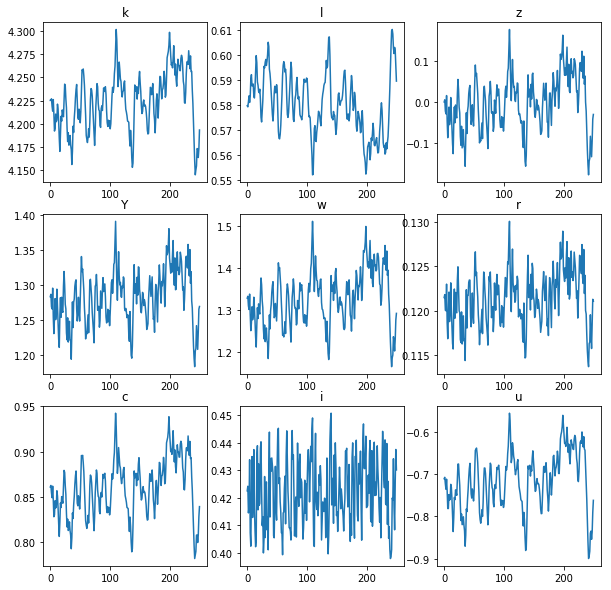

In [14]:
from numpy import random
from LinApp_SSL import LinApp_SSL
σ = 0.02
ZZ = []
nobs = 250
def one_simulation(i, params):
    ZZ = []
    KK = [kbar]
    random.seed(i)
    shock = σ * 6 * random.random(250) - 3 * σ
    for j in range(250):
        if j == 0:
            zp = (1-ρ) * 0 + ρ * 0 + shock[j]
        else:
            zp = (1-ρ) * 0 + ρ * ZZ[j-1] + shock[j]
        ZZ.append(zp)
    Zhist = np.hstack((np.array([0]), (np.array(ZZ))))
    zhist = np.reshape(Zhist,(nobs+1,1))
    
    k0 = np.array([[kbar]])
    l0 = np.array([[lbar]])

    # create a history of k's and ell's using LinApp_SSL
    khist, lhist =  LinApp_SSL(k0, zhist, XYbar, logX, PP, QQ, RR, SS)
    
    # create histories of remaining variables
    Yhist = np.zeros(nobs)
    whist = np.zeros(nobs)
    rhist = np.zeros(nobs)
    chist = np.zeros(nobs)
    ihist = np.zeros(nobs)
    uhist = np.zeros(nobs)
    for t in range(0,nobs):
        Yhist[t], whist[t], rhist[t], chist[t], uhist[t] = \
        Modeldefs(khist[t+1], khist[t], lhist[t], zhist[t], params)
    
    # delete last observation
    khist = khist[0:nobs]
    zhist = zhist[0:nobs]
    lhist = lhist[0:nobs]
    ihist = Yhist - chist
    
    return khist, lhist, zhist, Yhist, whist, rhist, chist, ihist, uhist

# see whether one simulation works fine
khist, lhist, zhist, Yhist, whist, rhist, chist, ihist, uhist = one_simulation(100, params)
time = range(0, nobs)
fig,ax = plt.subplots(3, 3, figsize = (10, 10))
# plt.subplot(3,3,1)
ax[0,0].plot(time, khist, label='k')
ax[0,0].set_title('k')
# plt.subplot(3,3,2)
ax[0,1].plot(time, lhist, label='l')
ax[0,1].set_title('l')
# plt.subplot(3,3,3)
ax[0,2].plot(time, zhist, label='z')
ax[0,2].set_title('z')
# plt.subplot(3,3,4)
ax[1,0].plot(time, Yhist, label='Y')
ax[1,0].set_title('Y')
# plt.subplot(3,3,5)
ax[1,1].plot(time, whist, label='w')
ax[1,1].set_title('w')
# plt.subplot(3,3,6)
ax[1,2].plot(time, rhist, label='r')
ax[1,2].set_title('r')
# plt.subplot(3,3,7)
ax[2,0].plot(time, chist, label='c')
ax[2,0].set_title('c')
# plt.subplot(3,3,8)
ax[2,1].plot(time, ihist, label='i')
ax[2,1].set_title('i')
# plt.subplot(3,3,9)
ax[2,2].plot(time, uhist, label='u')
ax[2,2].set_title('u')
plt.show()

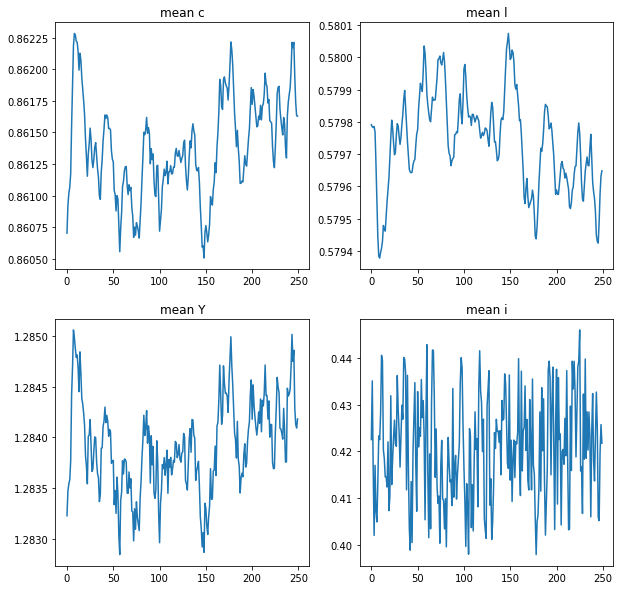

In [15]:
# note that 10000 simulations do take some time, so if you wanna see get some idea from the code, run 10 or 100 simulations.
# do not rerun this shell if you wan to keep the plots for 10000 simulations.

nsims = 10000
llhist = np.zeros((nsims, 250))
YYhist = np.zeros((nsims, 250))
cchist = np.zeros((nsims, 250))
iihist = np.zeros((nsims, 250))
for i in range(nsims):
    khist, lhist, zhist, Yhist, whist, rhist, chist, ihist, uhist = one_simulation(i, params)
    lhist = lhist.reshape(250)
    Yhist = Yhist.reshape(250)
    chist = chist.reshape(250)
    ihist = ihist.reshape(250)
    llhist[i] = lhist
    YYhist[i] = Yhist
    cchist[i] = chist
    iihist[i] = ihist
meanlhist = np.mean(llhist, axis = 0)
meanYhist = np.mean(YYhist, axis = 0)
meanchist = np.mean(cchist, axis = 0)
meanihist = np.mean(iihist, axis = 0)

fig,ax = plt.subplots(2, 2, figsize = (10, 10))
ax[0,0].plot(time, meanchist, label='c')
ax[0,0].set_title('mean c')
ax[0,1].plot(time, meanlhist, label='l')
ax[0,1].set_title('mean l')
ax[1,0].plot(time, meanYhist, label='Y')
ax[1,0].set_title('mean Y')
ax[1,1].plot(time, ihist, label='i')
ax[1,1].set_title('mean i')
plt.show()

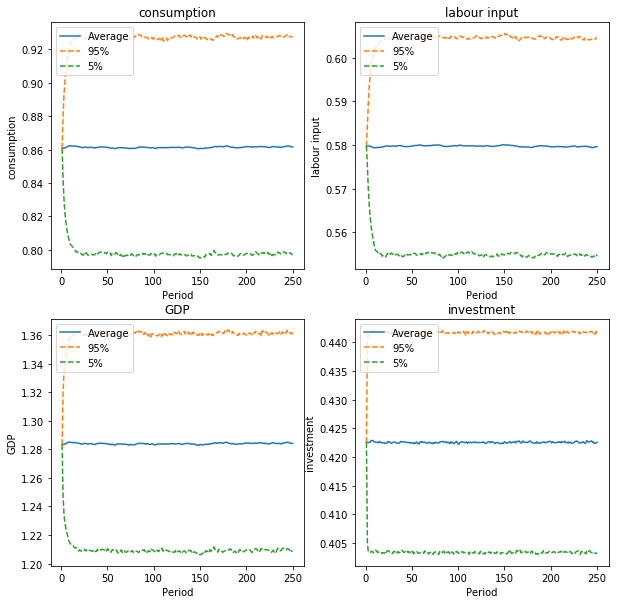

In [16]:
def plot_hist(ax, title, hist):
    x = np.arange(1, 251, 1)
    percent95 = np.percentile(hist, 95, axis=0)
    percent5 = np.percentile(hist, 5, axis=0)
    av = np.mean(hist, axis=0)
    ax.plot(x, av, label='Average')
    ax.plot(x, percent95, '--', label='95%')
    ax.plot(x, percent5, '--', label='5%')
    ax.set_xlabel('Period')
    ax.set_ylabel(title)
    ax.set_title(title)
    ax.legend(loc = 'upper left')
    
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2,figsize = (10,10))
plot_hist(ax1, 'consumption', cchist)
plot_hist(ax2, 'labour input', llhist)
plot_hist(ax3, 'GDP', YYhist)
plot_hist(ax4, 'investment', iihist)

## Exercise 8

from here onwards I use 100 simulations as 10000 takes too much time.

In [17]:
# please view this shell in a big enough screen

from scipy import stats

llhist = np.zeros((nsims, 250))
YYhist = np.zeros((nsims, 250))
cchist = np.zeros((nsims, 250))
iihist = np.zeros((nsims, 250))
kkhist = np.zeros((nsims, 250))
zzhist = np.zeros((nsims, 250))
wwhist = np.zeros((nsims, 250))
rrhist = np.zeros((nsims, 250))
uuhist = np.zeros((nsims, 250))
for i in range(nsims):
    khist = khist.reshape(250)
    lhist = lhist.reshape(250)
    Yhist = Yhist.reshape(250)
    chist = chist.reshape(250)
    ihist = ihist.reshape(250)
    zhist = zhist.reshape(250)
    whist = whist.reshape(250)
    rhist = rhist.reshape(250)
    uhist = uhist.reshape(250)
    kkhist[i] = khist
    llhist[i] = lhist
    YYhist[i] = Yhist
    cchist[i] = chist
    iihist[i] = ihist
    zzhist[i] = zhist
    wwhist[i] = whist
    rrhist[i] = rhist
    uuhist[i] = uhist

def mean(hist):
    return np.mean(hist, axis = 1)

def SD(hist):
    return np.std(hist, axis = 1)

def coeffi_var(hist):
    return mean(hist)/SD(hist)

def relative_vol(hist):
    return SD(hist)/SD(YYhist)

def persist(hist, t=1): # an online function that computes autocorrelation
    persistence = []
    for i in range(nsims):
        autocorr = np.corrcoef(np.array([hist[i][0:len(hist[i])-1], hist[i][1:len(hist[i])]]))[0,1]
        persistence.append(autocorr)   
    return persistence

def cyclicality(hist):
    cov = []
    for i in range(nsims):
        covar = np.corrcoef(np.array([hist[i], YYhist[i]]))[0,1]
        cov.append(covar)   
    return cov

hists = (kkhist, llhist, YYhist, cchist, iihist, zzhist, wwhist, rrhist, uuhist)
names = ('Capital', 'Labour input', 'GDP(output)', 'Consumption', 'Investment', 'shock', 
         'marginal return of labour = wage', 'marginal return of capital = rent', 'utility')
for i in range(len(hists)):
    hist = hists[i]
    print(names[i])
    print('Mean = {} with standard error {}'.format(np.mean(mean(hist)),stats.sem(mean(hist))))
    print('Standard deviation = {} with standard error {}'.format(np.mean(SD(hist)),stats.sem(SD(hist))))
    print('Coefficient of variation = {} with standard error {}'.format(np.mean(coeffi_var(hist)),stats.sem(coeffi_var(hist))))
    print('Relative volatility = {} with standard error {}'.format(np.mean(relative_vol(hist)),stats.sem(relative_vol(hist))))
    print('Persistence = {} with standard error {}'.format(np.mean(persist(hist)),stats.sem(persist(hist))))
    print('Cyclicality = {} with standard error {}'.format(np.mean(cyclicality(hist)),stats.sem(cyclicality(hist))))
    print('===================================================================================================')

Capital
Mean = 4.208215753494884 with standard error 8.882228319520568e-18
Standard deviation = 0.031960532249923394 with standard error 6.939240874625444e-20
Coefficient of variation = 131.66913869229987 with standard error 0.0
Relative volatility = 0.8274190585187795 with standard error 2.220557079880142e-18
Persistence = 0.9377907068735127 with standard error 1.110278539940071e-18
Cyclicality = 0.8180933927242671 with standard error 2.220557079880142e-18
Labour input
Mean = 0.5865716226973321 with standard error 0.0
Standard deviation = 0.012524309261374454 with standard error 5.2044306559690836e-20
Coefficient of variation = 46.834648558731004 with standard error 7.105782655616455e-17
Relative volatility = 0.3242390363404951 with standard error 5.551392699700355e-19
Persistence = 0.9564788142628394 with standard error 3.3308356198202135e-18
Cyclicality = -0.9301854258198471 with standard error 2.220557079880142e-18
GDP(output)
Mean = 1.2644191544402053 with standard error 4.4411141

## Exercise 9
Assume that the shock happens at period 10, plot the IRF from period 0 to 50.

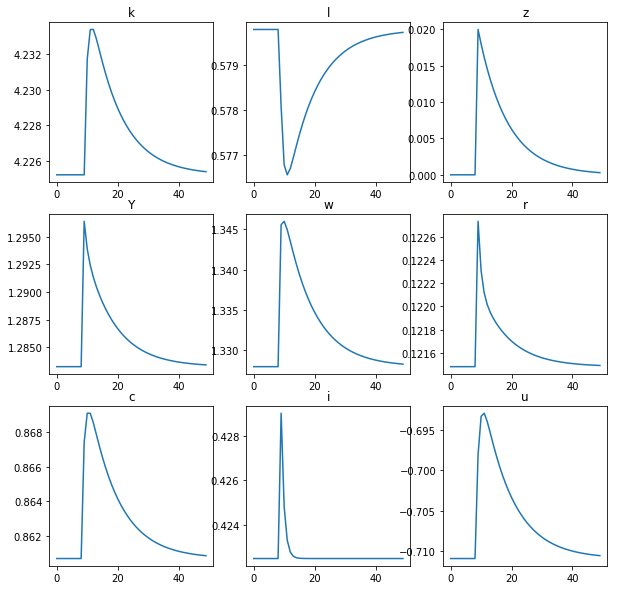

In [18]:
# set number of observations
nobs = 50 

# create a history of z's using equation (7)
zhist = np.zeros(nobs+1)
#epshist = sigma*np.random.normal(0., 1., nobs+1)
epshist = np.zeros(nobs+1)
epshist[9] = σ
zhist[0] = epshist[0]
for t in range(1,nobs+1):
    zhist[t] = ρ*zhist[t-1] + epshist[t]
    
# LinApp_SSL requires that Zhist be a 2-dimensional array
Zhist = np.reshape(zhist, (nobs+1, 1))

# Linapp_SSL also requires that starting values be arrays
k0 = np.array([[kbar]])
l0 = np.array([[lbar]])

# create a history of k's and ell's using LinApp_SSL
khist, lhist =  LinApp_SSL(k0, Zhist ,XYbar, logX, PP, QQ, RR, SS)

# create histories of remaining variables
Yhist = np.zeros(nobs)
whist = np.zeros(nobs)
rhist = np.zeros(nobs)
chist = np.zeros(nobs)
ihist = np.zeros(nobs)
uhist = np.zeros(nobs)
for t in range(0,nobs):
    Yhist[t], whist[t], rhist[t], chist[t], uhist[t] = \
        Modeldefs(khist[t+1], khist[t], lhist[t], zhist[t], params)
        
# delete last observation
khist = khist[0:nobs]
zhist = zhist[0:nobs]
lhist = lhist[0:nobs]
ihist = Yhist - chist
# plot time series
time = range(0, nobs)

fig,ax = plt.subplots(3, 3, figsize = (10, 10))
# plt.subplot(3,3,1)
ax[0,0].plot(time, khist, label='k')
ax[0,0].set_title('k')
# plt.subplot(3,3,2)
ax[0,1].plot(time, lhist, label='l')
ax[0,1].set_title('l')
# plt.subplot(3,3,3)
ax[0,2].plot(time, zhist, label='z')
ax[0,2].set_title('z')
# plt.subplot(3,3,4)
ax[1,0].plot(time, Yhist, label='Y')
ax[1,0].set_title('Y')
# plt.subplot(3,3,5)
ax[1,1].plot(time, whist, label='w')
ax[1,1].set_title('w')
# plt.subplot(3,3,6)
ax[1,2].plot(time, rhist, label='r')
ax[1,2].set_title('r')
# plt.subplot(3,3,7)
ax[2,0].plot(time, chist, label='c')
ax[2,0].set_title('c')
# plt.subplot(3,3,8)
ax[2,1].plot(time, ihist, label='i')
ax[2,1].set_title('i')
# plt.subplot(3,3,9)
ax[2,2].plot(time, uhist, label='u')
ax[2,2].set_title('u')
plt.show()